In [1]:
import cv2
import glob
from shutil import copyfile
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import re
import pickle

%matplotlib inline

In [2]:
# clear all folders
def clear_folders(folder_name):
    emo_folders = glob.glob("%s/*" % folder_name)
    for emo_folder in emo_folders:
        # grab all image files and delete them
        images = glob.glob("%s/*"%emo_folder)
        print(emo_folder, len(images))
        for image in images:
            try:
                if os.path.isfile(image):
                    os.unlink(image)
            except Exception as e:
                print(e)
                return -1
    return 1
        

In [3]:
face_encoding = {0:"neutral", 1:"anger", 2:"contempt", 3:"disgust", 4:"fear", 5:"happy", 6:"sadness", 7:"surprise"}
# emotions = ["neutral", "anger", "contempt", "disgust", "fear", "happy", "sadness", "surprise"] #Define emotion order
emotions = ["neutral", "anger", "disgust", "happy", "surprise"]
participants = glob.glob("ck_export/source_emotion/*") #Returns a list of all folders with participant numbers




In [ ]:
for x in participants:
    part = "%s" %x[-4:] # store current participant number
    for sessions in glob.glob("%s/*"%x): # Store list of sessions for current participant
        for files in glob.glob("%s/*" %sessions):
            current_session = files[30:-30]
            file = open(files, 'r')
            
            emotion = int(float(file.readline())) # emotions are encoded as float, readline as float then convert to integer.
            sourcefile_emotion = glob.glob("ck_export/source_images/%s/%s/*" % (part, current_session))[-1] # get path for last image in sequence, which containes the emotion
            sourcefile_neutral = glob.glob("ck_export/source_images/%s/%s/*" % (part, current_session))[0] # do same for neutral image
            
            dest_neut = "ck_export/sorted_set/neutral/%s" %sourcefile_neutral[35:] # generate path to put neutral image
            dest_emot = "ck_export/sorted_set/%s/%s" % (emotions[emotion], sourcefile_emotion[35:]) # Do the same for emotion containing image
            
            copyfile(sourcefile_neutral, dest_neut) # Copy file
            copyfile(sourcefile_emotion, dest_emot) # Copy file

In [53]:
print("len of participants:", len(participants))
for participant in participants:
    part = "%s"%participant[-4:]
    for session in glob.glob("%s/*"%participant):
        # now in a specific session
        current_session = session[-3:]
        for file in glob.glob("%s/*"%session):
            with open(file, 'r') as emo_file:
                emotion = int(float(emo_file.readline()))
            sourcefile_emotion = sorted(glob.glob("ck_export/source_images/%s/%s/*"%(part, current_session)))
            sourcefile_neutral = sorted(glob.glob("ck_export/source_images/%s/%s/*"%(part, current_session)))
            ses = sourcefile_emotion[-3:]
            sn = sourcefile_neutral[0]
            
            dest_n = "ck_export/sorted_set/neutral/%s"%sn[33:]
            dest_es = ["ck_export/sorted_set/%s/%s" % (emotions[emotion], se[33:]) for se in ses]
            for i in range(3):
                copyfile(ses[i], dest_es[i])
            copyfile(sn, dest_n)
#             if emotion == 1:
#                 plt.imshow(cv2.cvtColor(cv2.imread(sourcefile_emotion[0]), cv2.COLOR_BGR2RGB))
#                 plt.show()

len of participants: 123


In [ ]:
print(se1)
print(se1[33:])

In [52]:
clear_folders("ck_export/sorted_set")
print(sourcefile_emotion)
print(sourcefile_emotion[35:])
print(current_session)

ck_export/sorted_set/happy 207
ck_export/sorted_set/sadness 84
ck_export/sorted_set/neutral 327
ck_export/sorted_set/disgust 177
ck_export/sorted_set/anger 135
ck_export/sorted_set/contempt 54
ck_export/sorted_set/surprise 249
ck_export/sorted_set/fear 75
['ck_export/source_images/S506/002/S506_002_00000001.png', 'ck_export/source_images/S506/002/S506_002_00000002.png', 'ck_export/source_images/S506/002/S506_002_00000003.png', 'ck_export/source_images/S506/002/S506_002_00000004.png', 'ck_export/source_images/S506/002/S506_002_00000005.png', 'ck_export/source_images/S506/002/S506_002_00000006.png', 'ck_export/source_images/S506/002/S506_002_00000007.png', 'ck_export/source_images/S506/002/S506_002_00000008.png', 'ck_export/source_images/S506/002/S506_002_00000009.png']
[]
002


In [4]:
faceDet = cv2.CascadeClassifier("OpenCV_FaceCascade/haarcascade_frontalface_default.xml")
faceDet_two = cv2.CascadeClassifier("OpenCV_FaceCascade/haarcascade_frontalface_alt2.xml")
faceDet_three = cv2.CascadeClassifier("OpenCV_FaceCascade/haarcascade_frontalface_alt.xml")
faceDet_four = cv2.CascadeClassifier("OpenCV_FaceCascade/haarcascade_frontalface_alt_tree.xml")

def detect_faces(emotion):
    files = sorted(glob.glob("ck_export/sorted_set/%s/*" %emotion)) #Get list of all images with emotion

    filenumber = 0
    for f in files:
        frame = cv2.imread(f) #Open image
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #Convert image to grayscale
        
        #Detect face using 4 different classifiers
        face = faceDet.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        face_two = faceDet_two.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        face_three = faceDet_three.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        face_four = faceDet_four.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)

        #Go over detected faces, stop at first detected face, return empty if no face.
        if len(face) == 1:
            facefeatures = face
        elif len(face_two) == 1:
            facefeatures = face_two
        elif len(face_three) == 1:
            facefeatures = face_three
        elif len(face_four) == 1:
            facefeatures = face_four
        else:
            facefeatures = ""
        
        #Cut and save face
        for (x, y, w, h) in facefeatures: #get coordinates and size of rectangle containing face
#             print("face found in file: %s" %f)
            gray = gray[y:y+h, x:x+w] #Cut the frame to size
            
            try:
                out = cv2.resize(gray, (350, 350)) #Resize face so all images have same size
                cv2.imwrite("ck_export/dataset/%s/%s.jpg" %(emotion, filenumber), out) #Write image
            except:
               pass #If error, pass file
        filenumber += 1 #Increment image number

for emotion in emotions: 
    detect_faces(emotion) #Call functiona

## Train test split

In [4]:
clear_folders("ck_export/dataset/train")
clear_folders("ck_export/dataset/test")

ck_export/dataset/train/happy 165
ck_export/dataset/train/sadness 67
ck_export/dataset/train/neutral 261
ck_export/dataset/train/disgust 141
ck_export/dataset/train/anger 108
ck_export/dataset/train/contempt 43
ck_export/dataset/train/surprise 199
ck_export/dataset/train/fear 60
ck_export/dataset/test/happy 41
ck_export/dataset/test/sadness 16
ck_export/dataset/test/neutral 65
ck_export/dataset/test/disgust 35
ck_export/dataset/test/anger 27
ck_export/dataset/test/contempt 10
ck_export/dataset/test/surprise 49
ck_export/dataset/test/fear 15


1

In [5]:
fishface = cv2.face.FisherFaceRecognizer_create()
data = {}
def train_test_split(emotion): #Define function to get file list, randomly shuffle it and split
    files = glob.glob("ck_export/dataset/%s/*"%emotion)
    random.shuffle(files)
    training = files[:int(len(files) * 0.8)] # get first 80% of the file list
    test = files[-int(len(files) * 0.2): ] # get the last 205 of the file list
    return training, test

def make_sets(export=False):
    training_data = []
    training_labels = []
    test_data = []
    test_labels = []
    for emotion in emotions:
        training, test = train_test_split(emotion)
        # Append data to training and test list, and generate labels 0-7
        for item in training:
            if export:
                copyfile(item, "ck_export/dataset/train/%s/%s"%(emotion, re.findall(r'[\d]*.jpg', item)[0]))
            image = cv2.imread(item) # open image
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to grayscale
            training_data.append(gray) # append image to training data
            training_labels.append(emotions.index(emotion))
            
        for item in test:
            if export:
                copyfile(item, "ck_export/dataset/test/%s/%s"% (emotion, re.findall(r'[\d]*.jpg', item)[0]))
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            test_data.append(gray)
            test_labels.append(emotions.index(emotion))
    
    return training_data, training_labels, test_data, test_labels

def run_recognizer():
    training_data, training_labels, test_data, test_labels = make_sets()
    print("training fisher face classifier")
    print("size of training set is:", len(training_labels), "images")
    fishface.train(training_data, np.asarray(training_labels))
    
    print("predicting classification set")
    cnt=0
    correct=0
    incorrect=0
    for image in test_data:
        pred, conf = fishface.predict(image)
        if pred == test_labels[cnt]:
            correct += 1
            cnt += 1
        else:
            incorrect += 1
            cnt += 1
    return ((100*correct)/(correct + incorrect))


In [6]:
make_sets(export=True)

([array([[67, 66, 65, ..., 85, 85, 86],
         [65, 65, 65, ..., 85, 85, 85],
         [65, 66, 66, ..., 85, 85, 85],
         ..., 
         [72, 71, 71, ..., 82, 82, 82],
         [72, 71, 70, ..., 81, 81, 81],
         [73, 72, 71, ..., 81, 81, 81]], dtype=uint8),
  array([[20, 20, 20, ..., 41, 40, 40],
         [22, 22, 21, ..., 40, 39, 39],
         [22, 22, 21, ..., 38, 38, 38],
         ..., 
         [20, 20, 20, ..., 19, 20, 20],
         [21, 21, 21, ..., 19, 19, 19],
         [22, 22, 22, ..., 18, 18, 18]], dtype=uint8),
  array([[55, 56, 56, ..., 60, 61, 62],
         [53, 53, 54, ..., 60, 61, 61],
         [54, 55, 56, ..., 60, 61, 61],
         ..., 
         [40, 41, 41, ..., 50, 50, 50],
         [41, 41, 42, ..., 51, 51, 50],
         [42, 42, 42, ..., 51, 50, 50]], dtype=uint8),
  array([[106, 106, 105, ..., 113, 114, 114],
         [107, 106, 106, ..., 114, 113, 112],
         [107, 106, 105, ..., 116, 113, 112],
         ..., 
         [ 83,  83,  83, ...,  79,  7

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
np.random.seed(123)
%matplotlib inline

In [ ]:
# now run it
metascore = []
for i in range(0, 10):
    correct = run_recognizer()
    print("got", correct, "percent correct! ")
    metascore.append(correct)
    
print("\n\nend score:", np.mean(metascore), "percent correct !")

In [5]:
import pickle

with open("fisher face classifer.pickle", 'wb') as handle:
    pickle.dump(fishface, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [6]:
correct = run_recognizer()
print("got", correct, "percent correct! ")

training fisher face classifier
size of training set is: 874 images
predicting classification set
got 99.07834101382488 percent correct! 


In [11]:
image = cv2.imread("ck_export/dataset/test/anger/100.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
pred, conf = fishface.predict(gray)

In [12]:
print(pred)
print(conf)
fishface.save("fisher face classifer.xml")

1
0.0


In [14]:
video_capture = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_SIMPLEX

feelings_faces = []
for index, emotion in enumerate(emotions):
  feelings_faces.append(cv2.imread('./emojis/' + emotion + '.png', -1))

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    if frame is not None:
        # Predict result with network
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #Convert image to grayscale
        
        #Detect face using 4 different classifiers
        face = faceDet.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        face_two = faceDet_two.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        face_three = faceDet_three.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        face_four = faceDet_four.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)

        #Go over detected faces, stop at first detected face, return empty if no face.
        if len(face) == 1:
            facefeatures = face
        elif len(face_two) == 1:
            facefeatures = face_two
        elif len(face_three) == 1:
            facefeatures = face_three
        elif len(face_four) == 1:
            facefeatures = face_four
        else:
            facefeatures = ""
        
        #Cut and save face
        
        for i, (x, y, w, h) in enumerate(facefeatures): #get coordinates and size of rectangle containing face
#             print("face found in file: %s" %f)
            gray = gray[y:y+h, x:x+w] #Cut the frame to size
            gray = cv2.resize(gray, (350, 350)) #Resize face so all images have same size
            cv2.rectangle(frame, (x, y), (x + w, y+h), (0, 255, 0), 2)

        
#         gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         gray = cv2.resize(gray, (350, 350))
            pred, conf = fishface.predict(gray)
        
            for index, emotion in enumerate(emotions):
                cv2.putText(frame, emotion, (10, index * 20 + 20), cv2.FONT_HERSHEY_PLAIN, 0.5, (0, 255, 0), 1);
#             cv2.rectangle(frame, (130, index * 20 + 10), (130 + int(pred * 100), (index + 1) * 20 + 4), (255, 0, 0), -1)
        
            face_image = feelings_faces[pred]

        # Ugly transparent fix
            for c in range(0, 3):
                frame[200 + (i*50):320, 10:130, c] = face_image[:,:,c] * (face_image[:, :, 3] / 255.0) +  frame[200:320, 10:130, c] * (1.0 - face_image[:, :, 3] / 255.0)

        cv2.imshow('Video', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

In [24]:
video_capture.release()
cv2.destroyAllWindows()

actual  happy predicted:  happy


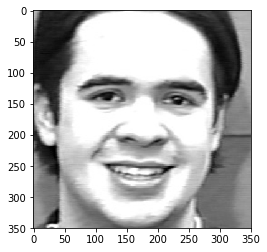

actual  happy predicted:  happy


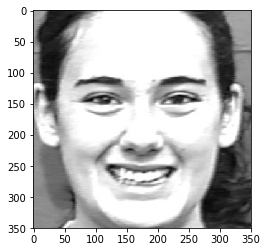

actual  neutral predicted:  neutral


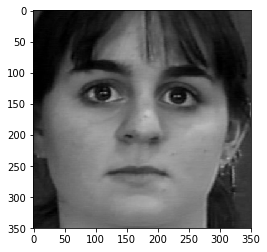

actual  neutral predicted:  neutral


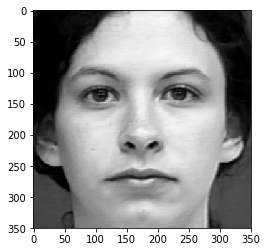

actual  neutral predicted:  neutral


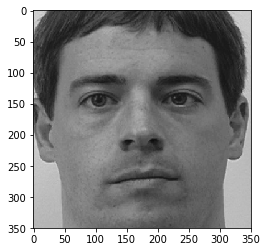

actual  disgust predicted:  disgust


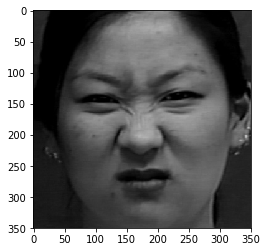

actual  disgust predicted:  disgust


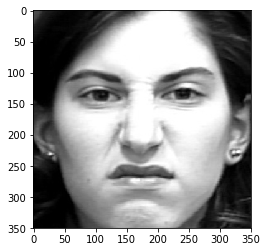

actual  happy predicted:  happy


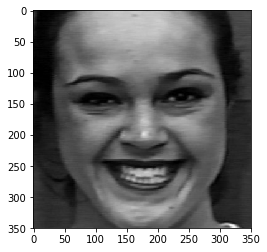

actual  surprise predicted:  surprise


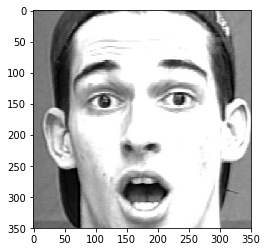

actual  surprise predicted:  surprise


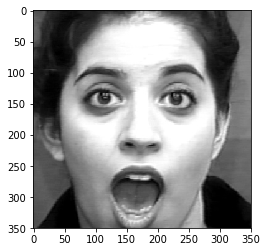

actual  neutral predicted:  neutral


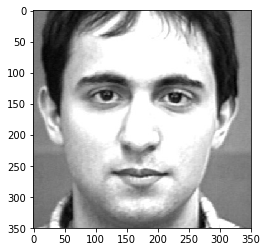

actual  surprise predicted:  surprise


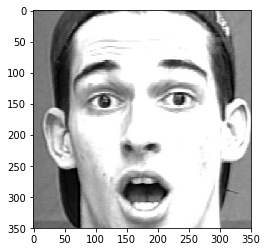

actual  neutral predicted:  neutral


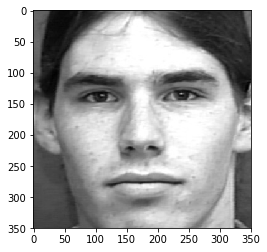

actual  happy predicted:  happy


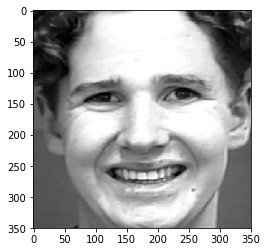

actual  surprise predicted:  surprise


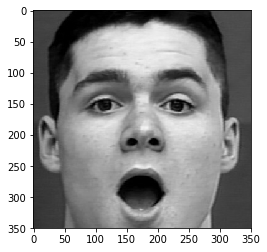

actual  surprise predicted:  surprise


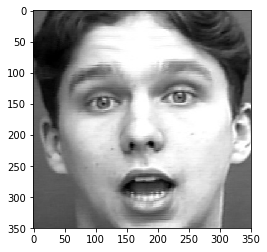

actual  neutral predicted:  neutral


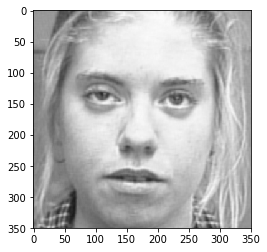

actual  happy predicted:  happy


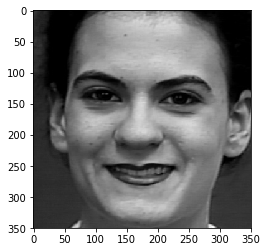

actual  disgust predicted:  disgust


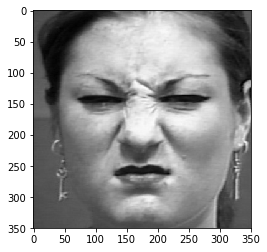

actual  neutral predicted:  neutral


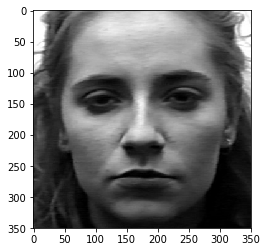

actual  neutral predicted:  neutral


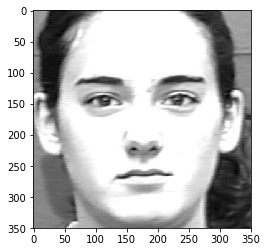

actual  neutral predicted:  neutral


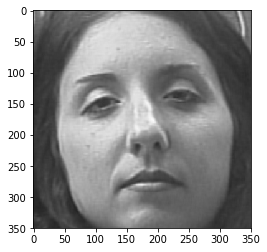

actual  disgust predicted:  disgust


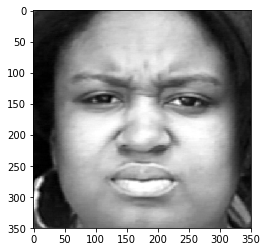

actual  surprise predicted:  surprise


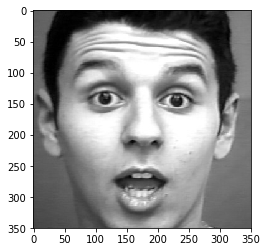

actual  disgust predicted:  disgust


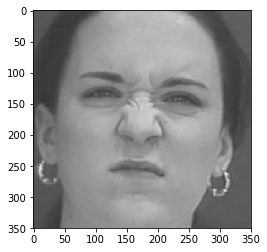

actual  happy predicted:  happy


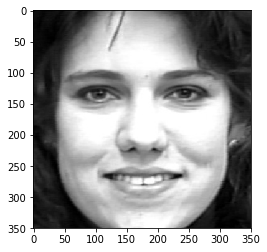

actual  anger predicted:  anger


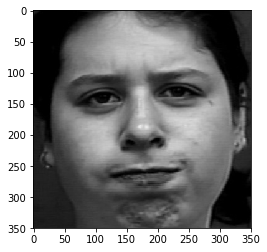

actual  surprise predicted:  surprise


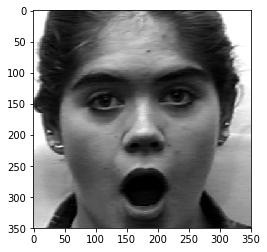

actual  disgust predicted:  disgust


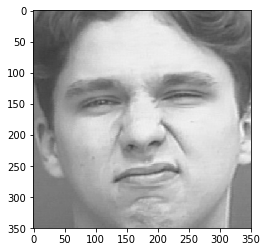

actual  disgust predicted:  disgust


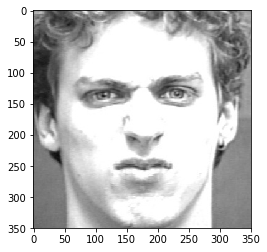

actual  neutral predicted:  neutral


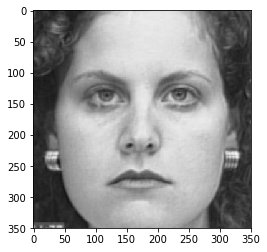

actual  anger predicted:  anger


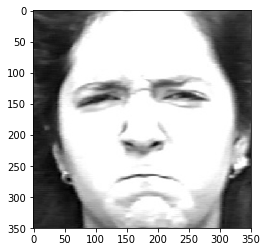

actual  happy predicted:  happy


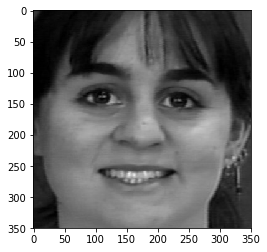

actual  surprise predicted:  surprise


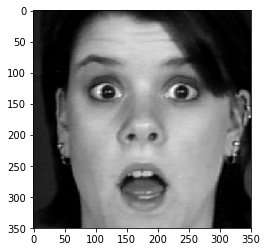

actual  happy predicted:  happy


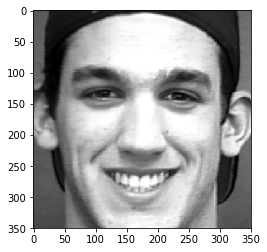

actual  surprise predicted:  surprise


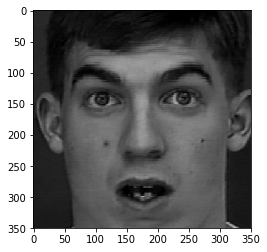

actual  surprise predicted:  surprise


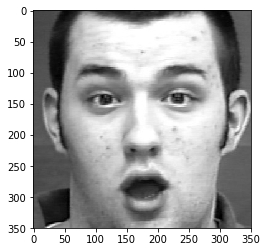

actual  neutral predicted:  neutral


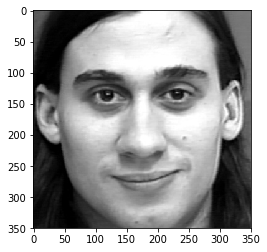

actual  happy predicted:  happy


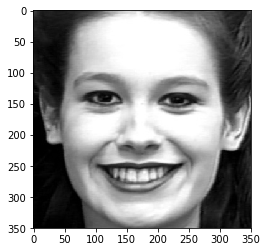

actual  happy predicted:  happy


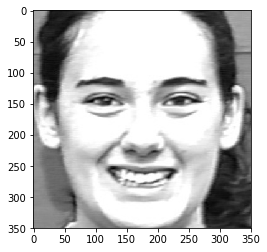

actual  neutral predicted:  neutral


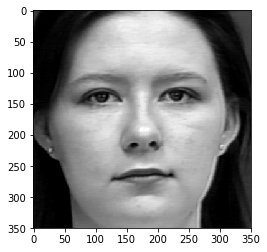

actual  surprise predicted:  surprise


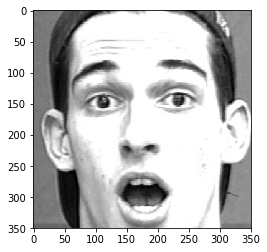

actual  happy predicted:  happy


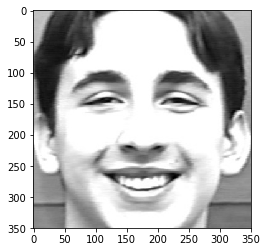

actual  anger predicted:  neutral


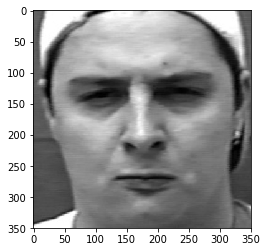

actual  neutral predicted:  neutral


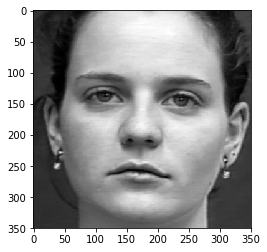

actual  neutral predicted:  neutral


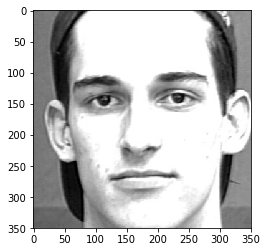

actual  happy predicted:  happy


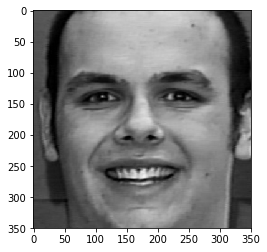

actual  neutral predicted:  neutral


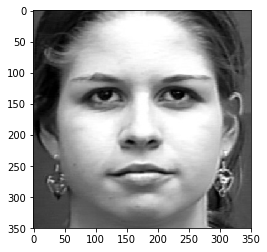

actual  neutral predicted:  neutral


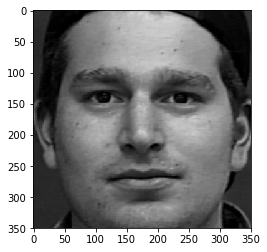

actual  neutral predicted:  neutral


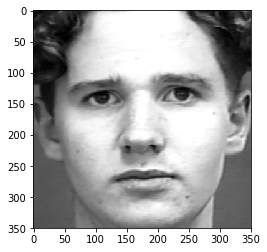

In [22]:
for emotion in emotions:
    training_data, training_labels, test_data, test_labels = make_sets()
    l = list(zip(test_data, test_labels))
    random.shuffle(l)
    
    for image, label in l[:10]:
        pred, conf = fishface.predict(image)
        face_image = feelings_faces[pred]

        # Ugly transparent fix
        print("actual ", emotions[label], "predicted: ", emotions[pred])
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
#         plt.imshow(image)
        plt.show()